# Jason Curtis
### DS 5230
### October 21, 2024
### Midterm Exam

# All Responses and Code for Question 1

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# enhance readability for data investigation
pd.options.display.float_format = '{:,.2f}'.format
mba_df = pd.read_csv('td.csv', delimiter=' ')

In [2]:
# process data with apriori algorithm
frequent_itemsets = apriori(mba_df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='support', min_threshold=0.2)

# process rules objects into dataframe
rule_entries = []
for _, rule in rules.iterrows():
    if len(rule['consequents']) == 1:
        rule_entry = {'antecedents' : set(rule['antecedents']),
                      'consequents' : set(rule['consequents']),
                      'support' : rule['support'],
                      'confidence' : rule['confidence'],
                      'lift' : rule['lift']}
        rule_entries.append(rule_entry)     
apriori_df = pd.DataFrame(rule_entries, columns=['antecedents', 'consequents', 'support', 'lift', 'confidence'])

In [3]:
# determine extremes and rule breakdown for contextual evaluation
lift_df = apriori_df[apriori_df['lift']>=1.2]
print(f'Maximum lift: {apriori_df.loc[apriori_df["lift"].idxmax()]["lift"]:.3f}\n'
      f'Minimum lift: {apriori_df.loc[apriori_df["lift"].idxmin()]["lift"]:.3f}\n'
      f'Percentage of rules with lift >= 1.2: {len(lift_df) / len(apriori_df):.3f}')

Maximum lift: 1.823
Minimum lift: 0.956
Percentage of rules with lift >= 1.2: 0.431


### 1a)
Rules with lift near 1 are likely not useful associations to consider. Because a lift equal to 1 implies the occurrence is independent, a rule slightly above 1 will indicate a minimally positive association. The maximum lift value in the set is 1.82 and ~43% of the rules are above a lift value of 1.2. For this reason, I would discount rules below 1.20 to streamline the evaluation process.


### 1b)
Rules below 1 can be useful at greater magnitude. A lift of 0.7, for example, would indicate a meaningful negative correlation. Were I to have a rule with lift that low the investment strategy would be to acknowledge that if company A has day of stock price increase, then I would expect company B's stock to decrease in price. From this information, I would predict that the best time to buy stock in company B would be following a long run of increasing days by company A, but while company A's stock price is expected to decrease soon. This would put company B's stock at its lowest relative price with an expected increase in the short term

In [4]:
# find highest lift rules
apriori_df.sort_values(by='lift', ascending=False, inplace=True)
print(apriori_df.head(10))

         antecedents consequents  support  lift  confidence
142  {HPE, AAL, AAP}       {DAL}     0.21  1.82        0.90
76        {SUN, AAL}       {DAL}     0.21  1.82        0.90
57        {AAL, AAP}       {DAL}     0.28  1.77        0.87
140  {DAL, HPE, AAP}       {AAL}     0.21  1.77        0.81
79        {XOM, AAL}       {DAL}     0.20  1.75        0.86
56        {DAL, AAP}       {AAL}     0.28  1.68        0.77
70        {HPE, AAL}       {DAL}     0.27  1.68        0.83
77        {DAL, XOM}       {AAL}     0.20  1.65        0.76
65        {DAL, GOO}       {AAL}     0.25  1.63        0.75
68        {DAL, HPE}       {AAL}     0.27  1.63        0.75


### 1c)
The highest lift rules have the following metrics: 

1. {AAL, HPE, AAP} --> {DAL}: Support = 0.21, Lift = 1.82, Confidence = 0.90
2. {AAL, SUN} --> {DAL}: Support = 0.21, Lift = 1.82, Confidence = 0.90
3. {AAP, AAL} --> {DAL}: Support = 0.28, Lift = 1.77, Confidence = 0.87
4. {AAP, HPE, DAL} --> {AAL}: Support = 0.21, Lift = 1.77, Confidence = 0.81

These appear to be good rules given the confidence of the rules are 0.9 in addition to the high lift value. This would indicate a high positive correlation as well as high frequency of association. Additionally, while the support values of 0.20 to 0.28 are low for our set it does indicate that these rules are relevant to over 20% of trading days. However, upon investigating the rules it is important to note the industries involved. The consequent of all is either Delta or American Airlines and the other is always present as an Antecedent. Other companies involved include Advanced Auto Parts, Hewlett Packard, ExxonMobil, and Sunoco. Intuitively, an auto parts company and an IT company would not be associated directly with fluctuations in the airline industry but fuel companies such as Sunoco and ExxonMobil are more likely directly involved. By investigating individual rules I find the following:

1. AAL --> DAL: Lift of 1.6, confidence of 0.79
2. DAL --> AAL: Lift of 1.6, confidence of 0.73
3. HPE --> DAL: Lift of 1.44, confidence of 0.71
4. HPE --> AAL: Lift of 1.41, confidence of 0.65
5. SUN --> DAL: Lift of 1.26, confidence of 0.62
6. SUN --> AAL: Lift of 1.09, confidence of 0.50
7. AAP --> DAL: Lift of 1.13, confidence of 0.56
8. AAP --> AAL: Lift of 1.08, confidence of 0.49
9. XOM --> DAL: Lift of 1.12, confidence of 0.55
10. XOM --> AAL: Lift of 1.05, confidence of 0.48

For all rules in this set, DAL is a stronger consequent than AAL, so I will analyze them with reference to DAL.

These rules demonstrate that the single most important association in this set is AAL --> DAL. HPE --> DAL is another decent candidate, but the other two have significantly lower lifts and confidence metrics. This follows my intuition that American Airlines having a good day would improve the chances that Delta Airlines has a good day, reflecting an overall positive trend in airline industry stock performance. However, the presence of XOM and SUN individually are both of relatively low importance with lower lifts and confidence nearer to 0.5, indicating that my intuition about the link between fuel and airline companies is not as important as originally suspected. The other associations included in these sets may reflect either an overall positive trend in the market as a whole or may indicate un-investigated companies are involved such as manufacturers that supply both HPE and DAL with parts or services. I would use these rules to recommend the following investment strategies:

1. Tracking AAL's performance as an indicator of DAL's performance is somewhat moot. If they are positively correlated then tracking the airline industry as a whole should be a simpler way to predict performance of individual stocks. 
2. Investigate a broader dataset for more rules involving DAL, AAL, HPE, and SUN to determine if other companies have important correlations
3. If companies are found, try to investigate how these companies are cross-related. Do they have connections to the other companies? If so, this may indicate that the performance of Delta Airlines and Hewlett Packard are linked by the performance of a supplier or service provider. By determining this information I can more appropriately predict that when the supplier company is increasing in value then I should buy stock in both Delta and HP and predict that their values will rise accordingly. 

In [5]:
# find lowest lift rules
apriori_df.sort_values(by='lift', ascending=True, inplace=True)
print(apriori_df.head(10))

    antecedents consequents  support  lift  confidence
105  {GOO, AAP}       {SUN}     0.20  0.96        0.45
43        {XOM}       {GOO}     0.30  0.99        0.60
42        {GOO}       {XOM}     0.30  0.99        0.49
108  {GOO, AAP}       {XOM}     0.22  1.00        0.49
22        {SUN}       {AAP}     0.31  1.01        0.66
23        {AAP}       {SUN}     0.31  1.01        0.48
46        {HPE}       {SUN}     0.25  1.02        0.48
47        {SUN}       {HPE}     0.25  1.02        0.52
38        {GOO}       {SON}     0.34  1.02        0.55
39        {SON}       {GOO}     0.34  1.02        0.62


### 1d)
The rules with the lowest lift are as follows:
 
1. {AAP, GOO} --> {SUN}: Support = 0.20, Lift = 0.96, Confidence = 0.45
2. {GOO} --> {XOM}: Support = 0.30, Lift = 0.99, Confidence = 0.49
3. {XOM} --> {GOO}: Support = 0.30, Lift = 0.99, Confidence = 0.60
4. {AAP, GOO} --> {XOM}: Support = 0.22, Lift = 1.00, Confidence = 0.49

I will not continue listing rules as all of these rules would qualify as a lift of "near 1" and thus the logic of my response to 1b) applies: these rules are not meaningfully associated and the companies are functionally independent. This follows my intuition in that all 20 rules with the lowest lift values involve a fuel company and a technology company opposite each other as either antecedent or consequent. The performance of a fuel company is not likely to have any influence on the performance of a technology company. 

While these rules near a lift value of 1 are not straightforward situations of "if company A increases, so did company B", they are nonetheless useful for understanding market relationships and bear general consideration. If the combination of two industries regularly produces rules of low lift value, it can be an indication that macroeconomic trends would not affect both industries in the same way. Thus I should not expect that an overall increase in tech company valuation also indicates that fuel companies are performing well. This is very useful to understand for portfolio diversification. An example "lower-risk" strategy to be learned from this information can be summed up as follows:

1. Determine industries that are independent of one another
2. If both industries are performing well, this is more significantly indicative of an overall market increase (and vice versa). Investments can assume a general market improvement
3. If industries are performing independently of one another, predict more stable macroeconomic trends. Focus on diversification of investments to reduce the magnitude of loss if one industry experiences a sudden downward trend.

By flipping the logic of the last step, this strategy can be adjusted as well for higher risk. Simply use the industry independence to focus all investments on one industry in the hopes that it will experience an unpredictable rise. This will maximize gain but is a very stupid investment strategy and reduces investing to gambling. 

In [6]:
# unpack company code sets to generate comparison list
companies = apriori_df['consequents'].apply(lambda x: next(iter(x))).unique()
lift_extremes = []

# find the highest and lowest lift rule for each company
for company in companies:
    company_df = apriori_df[apriori_df['consequents'] == {company}]
    lift_extremes.append(company_df.loc[company_df['lift'].idxmax()])
    lift_extremes.append(company_df.loc[company_df['lift'].idxmin()])

# sort by highest for ease of interpretation
lifts_df = pd.DataFrame(lift_extremes).sort_values(by='lift', ascending=False)
print(lifts_df)

         antecedents consequents  support  lift  confidence
76        {SUN, AAL}       {DAL}     0.21  1.82        0.90
140  {DAL, HPE, AAP}       {AAL}     0.21  1.77        0.81
119       {DAL, GOO}       {HPE}     0.25  1.52        0.78
138       {SUN, SON}       {XOM}     0.20  1.45        0.71
125       {DAL, XOM}       {SON}     0.20  1.40        0.76
139       {XOM, SON}       {SUN}     0.20  1.35        0.64
100       {HPE, AAP}       {GOO}     0.26  1.23        0.74
143  {DAL, AAL, HPE}       {AAP}     0.21  1.22        0.79
27             {GOO}       {DAL}     0.33  1.10        0.54
12             {XOM}       {AAL}     0.24  1.05        0.48
38             {GOO}       {SON}     0.34  1.02        0.55
47             {SUN}       {HPE}     0.25  1.02        0.52
22             {SUN}       {AAP}     0.31  1.01        0.66
43             {XOM}       {GOO}     0.30  0.99        0.60
42             {GOO}       {XOM}     0.30  0.99        0.49
105       {GOO, AAP}       {SUN}     0.2

### 1e)
SUN: Highest lift = 1.35, lowest = 0.96
XOM: Highest lift = 1.45, lowest = 0.99
GOO: Highest lift = 1.23, lowest = 0.99
AAP: Highest lift = 1.22, lowest = 1.01
HPE: Highest lift = 1.52, lowest = 1.02
SON: Highest lift = 1.40, lowest = 1.02
AAL: Highest lift = 1.77, lowest = 1.05
DAL: Highest lift = 1.82, lowest = 1.10

Because the highest lift value in this ruleset is 1.82, the metric for evaluation of an important rule is fairly strong. I would evaluate the following rules as strong associations in this context and thus worth using (or at least further investigating):

1. {AAL, SUN} --> {DAL}. With the highest lift of any rule in the set, this rule is the benchmark for importance
2. {AAP, HPE, DAL} --> {AAL}. This is the second highest lift rule. It involves a competitor airline to the first rule and can be used as a strong backup if Sunoco is performing poorly or rule 1 results in poorer outcomes than predicted.
3. {GOO, DAL} --> {HPE}. The highest lift non-airline consequent indicates that HPE will perform well when Google and Delta perform well. For those interested in investing in a tech company, this is an excellent starting point. 

# All Responses and Code for Question 2

In [7]:
import numpy as np
from sklearn.cluster import KMeans

df2 = pd.read_csv('measurementPoint-1.csv', delimiter=' ')

# prep to maintain important metrics
k_values = range(1, 8)
within_sums = []
between_sums = []
total_square_sums = ((df2 - df2.mean()) ** 2).sum().sum()
k_labels = {}

df_results = pd.DataFrame(columns=['numClusters', 'tot.withinss', 'tot.betweenss'])


for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=100, n_init=100, random_state=42).fit(df2)
    wcss = kmeans.inertia_
    bcss = total_square_sums - wcss
    within_sums.append(wcss)
    between_sums.append(bcss)
    df_results.loc[k-1] = [k, wcss, bcss]
    k_labels[k] = kmeans.fit_predict(df2)

print(df_results)

   numClusters  tot.withinss  tot.betweenss
0         1.00     53,075.65           0.00
1         2.00     41,425.68      11,649.98
2         3.00     33,362.02      19,713.63
3         4.00     29,157.97      23,917.68
4         5.00     25,462.40      27,613.26
5         6.00     24,241.01      28,834.64
6         7.00     23,112.74      29,962.91


In [8]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns

def plot_silhouette_and_metrics(distances, labels, num_clusters):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    
    # compute silhouette scores using precomputed distance matrix
    sil_vals = silhouette_samples(distances, labels, metric='precomputed')
    overall_avg_sil = silhouette_score(distances, labels, metric='precomputed')
    cluster_sil_avgs = []
    y_lower = 10 # separate from bottom of plot window
    
    for i in range(num_clusters):
        # aggregate silhouette scores for samples in this cluster
        cluster_sil_vals = sil_vals[labels == i]
        cluster_sil_vals.sort()
        cluster_sil_avgs.append(np.mean(cluster_sil_vals))
        
        # compute silhouette plot
        cluster_size = cluster_sil_vals.shape[0]
        y_upper = y_lower + cluster_size
        color = sns.color_palette('husl', num_clusters)[i]
        ax.fill_betweenx(np.arange(y_lower, y_upper),0, cluster_sil_vals, 
                         facecolor=color, edgecolor=color)
        
        # label the silhouette plots with cluster numbers
        ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
        y_lower = y_upper + 10  # improve readability
    
    # visualize only plots for k between 3 and 6 inclusive
    if 3 <= num_clusters <= 6:
        ax.axvline(x=overall_avg_sil, color='red', linestyle='--')
        ax.set_title(f'Silhouette plot for {num_clusters} clusters')
        ax.set_xlabel('Silhouette coefficient values')
        ax.set_ylabel('Cluster')
        ax.set_yticks([])  # clear the y-axis labels
        plt.show()
        
        print(f'K={num_clusters}:\n'
              f'Overall average silhouette width: {overall_avg_sil:.4f}\n'
              f'Minimum per-cluster average silhouette width: {min(cluster_sil_avgs):.4f}\n'
              f'Per-cluster average silhouette widths: {cluster_sil_avgs}\n')
    else:
        plt.close()
    
    # return metrics for table storage
    return overall_avg_sil, min(cluster_sil_avgs)

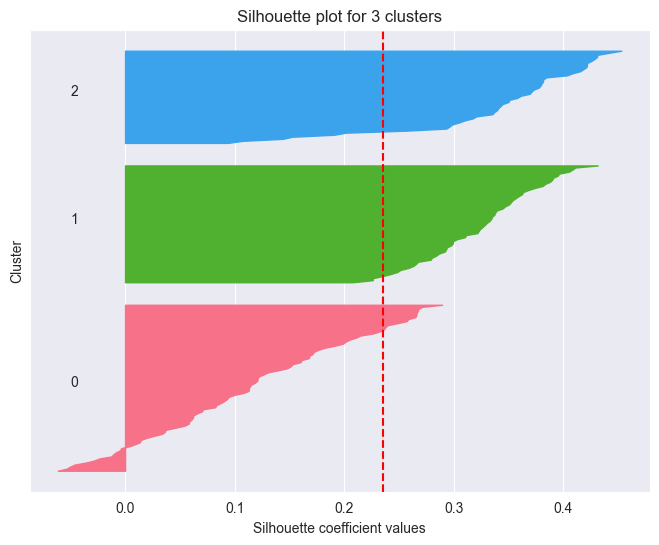

K=3:
Overall average silhouette width: 0.2358
Minimum per-cluster average silhouette width: 0.1146
Per-cluster average silhouette widths: [0.11460799358162675, 0.3240528445400049, 0.3404624611144529]


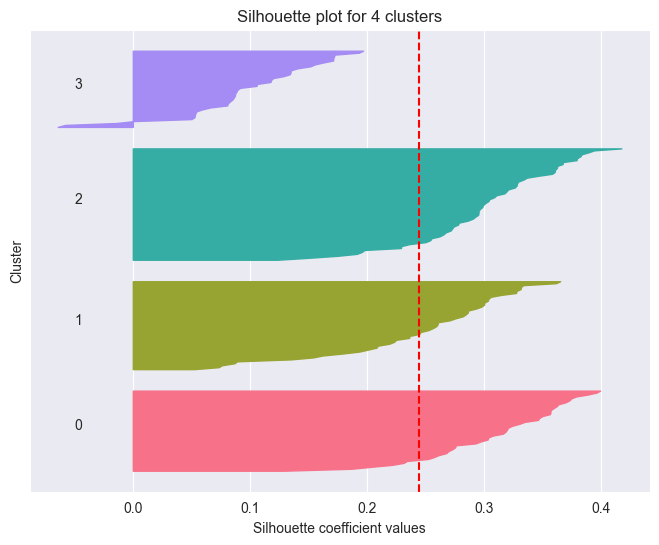

K=4:
Overall average silhouette width: 0.2446
Minimum per-cluster average silhouette width: 0.0976
Per-cluster average silhouette widths: [0.30914885648115314, 0.24392703396827692, 0.29975332953261374, 0.09758468411553316]


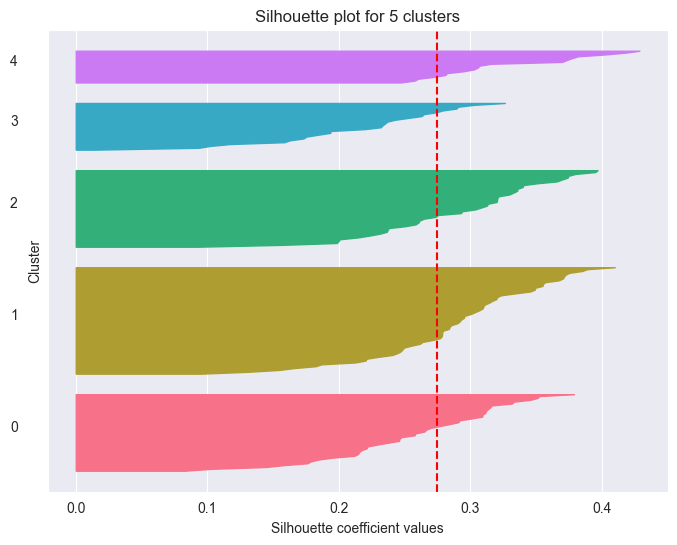

K=5:
Overall average silhouette width: 0.2746
Minimum per-cluster average silhouette width: 0.2119
Per-cluster average silhouette widths: [0.2564297346031813, 0.28812707580815805, 0.29048945473775467, 0.21193173186546177, 0.32653506990041853]


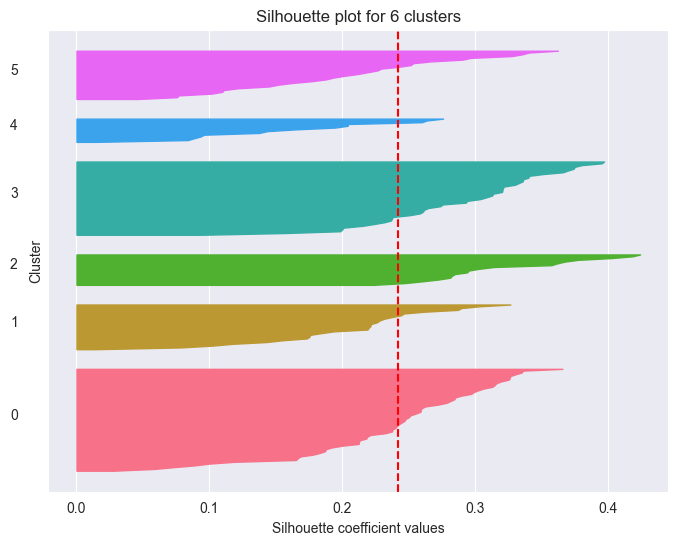

K=6:
Overall average silhouette width: 0.2421
Minimum per-cluster average silhouette width: 0.1587
Per-cluster average silhouette widths: [0.23882527525633065, 0.20278937601957805, 0.3201840404634648, 0.29048945473775467, 0.15871241146747841, 0.20400953891764087]


In [9]:
from scipy.spatial.distance import pdist, squareform

# initialize new dataframe columns
df_results['avgSilWidths'] = np.nan
df_results['minClusterAvgWidth'] = np.nan

# precompute distance matrix
distance_matrix = squareform(pdist(df2, metric='euclidean'))

for n_clusters in range(2, 8):
    avgSilWidth, minClusterAvgWidth = plot_silhouette_and_metrics(distance_matrix, k_labels[n_clusters], n_clusters)
    
    # set returned silhouette metrics to appropriate table cells
    df_results['avgSilWidths'].loc[df_results['numClusters'] == n_clusters] = avgSilWidth
    df_results['minClusterAvgWidth'].loc[df_results['numClusters'] == n_clusters] = minClusterAvgWidth

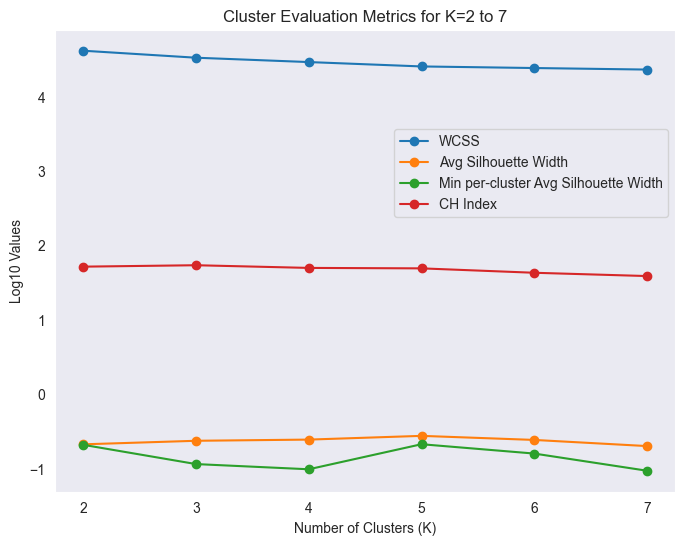

In [10]:
from sklearn.metrics import calinski_harabasz_score

# prep new column for CH index
df_results['CH'] = np.nan
ch_index = [np.nan]

# calculate CH index for k=2,3,4,5,6,7
for k in range(2, 8):
    ch_index.append(calinski_harabasz_score(df2, k_labels[k]))

# eliminate k=1 solution from df to avoid plotting errors
df_results['CH'] = ch_index
df_results_clean = df_results.drop(index=0)

# take logs of all metrics for plotting
log_wcss = np.log10(df_results_clean['tot.withinss'])
log_avg_sil = np.log10(df_results_clean['avgSilWidths'])
log_min_sil = np.log10(df_results_clean['minClusterAvgWidth'])
log_ch_index = np.log10(df_results_clean['CH'])

# plot construction
K_values = np.arange(2, 8)
plt.figure(figsize=(8, 6))
plt.plot(K_values, log_wcss, marker='o', label='WCSS')
plt.plot(K_values, log_avg_sil, marker='o', label='Avg Silhouette Width')
plt.plot(K_values, log_min_sil, marker='o', label='Min per-cluster Avg Silhouette Width')
plt.plot(K_values, log_ch_index, marker='o', label='CH Index')

# labels and legend
plt.title('Cluster Evaluation Metrics for K=2 to 7')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Log10 Values')
plt.xticks(K_values)
plt.legend(bbox_to_anchor=(1, 0.8))
plt.grid()
plt.show()

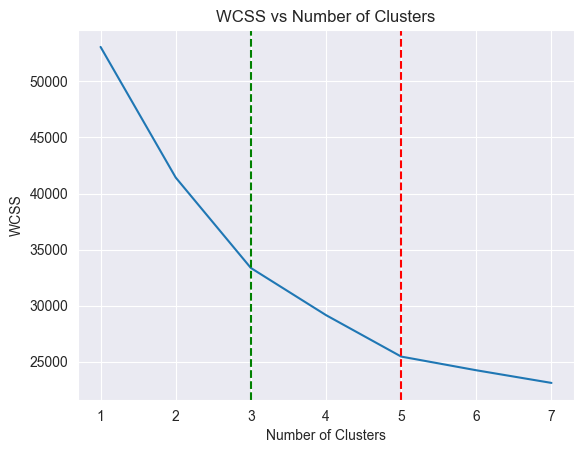

   numClusters  tot.withinss  tot.betweenss  avgSilWidths  minClusterAvgWidth  \
1         2.00     41,425.68      11,649.98          0.21                0.21   
2         3.00     33,362.02      19,713.63          0.24                0.11   
3         4.00     29,157.97      23,917.68          0.24                0.10   
4         5.00     25,462.40      27,613.26          0.27                0.21   
5         6.00     24,241.01      28,834.64          0.24                0.16   
6         7.00     23,112.74      29,962.91          0.20                0.09   

     CH  
1 51.75  
2 54.07  
3 49.76  
4 49.07  
5 42.82  
6 38.68  


In [11]:
# create WCSS plot for elbow analysis
plt.plot(k_values, within_sums)
plt.title('WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.axvline(x=3, color='g', linestyle='--')
plt.axvline(x=5, color='r', linestyle='--')
plt.show()
print(df_results_clean)  # show all final metrics

### 2e)
Based on the WCSS metric using the elbow method of evaluation, the best cluster value would be either k=3 or k=5. 5 clusters is the most significant magnitude change in the decreasing value of WCSS but 3 clusters also represents a significant shift in the minimization of WCSS. I would lean towards 5 as a better solution because at 3 clusters the WCSS is still dropping quickly. 

### 2f)
Based on silhouette plots, I identified k=3 and k=4 as poor candidates due to negative silhouette values present in one of the clusters. Between the two remaining candidates of K=5 and k=6 the better candidate is k=5 because it has the highest average silhouetted width and minimum per-cluster average at 0.27 and 0.21 respectively. Again I would select k=5 for the correct number of clusters.

### 2g)
The highest CH index is at k=3 and the second highest is k=2. This would indicate that k=3 is the optimal number of clusters by providing the highest degree of separation between clusters

### 2h)
This is a complicated question because the metric sets point to different values for k. The WCSS suggests both 3 and 5 as candidates while the silhouette and CH index each supports one of the two values. While the CH index is a strong indicator of the best number of clusters due to clarity of separation, the silhouette metrics for k=3 are quite poor. Not only do we see a low minimum per-cluster average width, but also a significant portion of the 3rd cluster has either a very low or negative coefficient. This indicates that the 3rd cluster in this solution has poor cohesion despite its high differentiation from the other clusters.

Due to the above, I would select k=5 as my preferred clustering solution. This has good support from the WCSS and silhouette metrics and maintains a relatively high CH index value. I believe this solution is the best balance between cluster cohesion and distinction.